In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

# 1. Chrome 드라이버 설정
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  # 창 띄우기
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# 2. 사이트 접속
driver.get("https://quotes.toscrape.com")
time.sleep(2)  # 로딩 대기

# 3. "Login" 버튼 클릭
login_link = driver.find_element(By.LINK_TEXT, "Login")
login_link.click()

# 4. 결과 확인용 대기
time.sleep(3)

# driver.quit()

# 웹사이트에서 직접 크롤링

In [1]:
import requests
from bs4 import BeautifulSoup

# 1. URL 설정
url = "http://quotes.toscrape.com/page/1/"

# 2. HTTP 요청
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# 3. 명언과 저자 추출
quotes = soup.find_all("div", class_="quote")

for quote in quotes:
    text = quote.find("span", class_="text").get_text()
    author = quote.find("small", class_="author").get_text()
    print(f"{text} — {author}")

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” — Albert Einstein
“It is our choices, Harry, that show what we truly are, far more than our abilities.” — J.K. Rowling
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” — Albert Einstein
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” — Jane Austen
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” — Marilyn Monroe
“Try not to become a man of success. Rather become a man of value.” — Albert Einstein
“It is better to be hated for what you are than to be loved for what you are not.” — André Gide
“I have not failed. I've just found 10,000 ways that won't work.” — Thomas A. Edison
“A woman is like a tea bag; you never know how strong it is until it's in hot water.” — Eleanor Roos

# NY Times 웹 크롤링 (API)

In [ ]:
import requests
import pandas as pd

API_KEY = ''

url = 'https://api.nytimes.com/svc/mostpopular/v2/viewed/1.json'
params = {
    "api-key" : API_KEY
}

response = requests.get(url, params=params)

data = response.json()
df = pd.json_normalize(data['results'])
df.head(1)

,uri,url,id,asset_id,source,published_date,updated,section,subsection,nytdsection,...,byline,type,title,abstract,des_facet,org_facet,per_facet,geo_facet,media,eta_id
0,nyt://article/145cfe92-7c5f-5da3-8ecf-6167d2e7...,https://www.nytimes.com/2025/06/17/nyregion/br...,100000010234457,100000010234457,New York Times,2025-06-17,2025-06-17 18:49:31,New York,,new york,...,By Luis Ferré-Sadurní,Article,Brad Lander Is Arrested by ICE Agents at Immig...,"Mr. Lander, the New York City comptroller and ...","[Immigration and Emigration, Elections, Mayors]","[Immigration and Customs Enforcement (US), Off...","[Lander, Brad]",[],"[{'type': 'image', 'subtype': 'photo', 'captio...",0


# 단일 학교의 1일 급식 정보 가져오기

In [ ]:
import requests
import pandas as pd

EDU_CODE = 'B10'
SCHOOL_CODE = '7021105'
API_KEY = ''
TARGET_DATE = '20241030' # 수요일

# 학교의 이름 가져오는 함수 
def get_school_name(edu_code, school_code):
    print(f'학교 이름 조회 예정 : 교육청={edu_code}, 학교코드={school_code}')
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY' : API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'SD_SCHUL_CODE' : school_code
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"응답코드 : {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "schoolInfo" in data:
                # 여기코드가 핵심
                name = data["schoolInfo"][1]["row"][0]["SCHUL_NM"]
                print(f"학교명: {name}")
                return name
            else:
                print("해당학교는 존재하지 않음", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"학교명 정보 조회 오류 : {e}")
    return "학교명조회불가"
        
get_school_name(EDU_CODE, SCHOOL_CODE)

학교 이름 조회 예정 : 교육청=B10, 학교코드=7021105
응답코드 : 200
학교명: 서울이문초등학교


'서울이문초등학교'

In [23]:
# 급식정보조회 같은 방식으로
def get_meal_info(edu_code, school_code):
    print(f"급식 정보 조회 중: 날짜={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_YMD": TARGET_DATE
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService 응답코드: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"급식 데이터 수: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo 키 없음:", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"급식 정보 조회 오류: {e}")
    return []

# 데이터 수집
school_name = get_school_name(EDU_CODE, SCHOOL_CODE)
meals = get_meal_info(EDU_CODE, SCHOOL_CODE)

data = []
for meal in meals:
    data.append({
        "교육청코드": EDU_CODE,
        "학교코드": SCHOOL_CODE,
        "학교명": school_name,
        "급식일자": meal.get("MLSV_YMD"),
        "식사명": meal.get("MMEAL_SC_NM"),
        "급식식단": meal.get("DDISH_NM")
    })

df = pd.DataFrame(data)
print("수집된 행 수:", len(df))
print(df.head())

df.to_csv("서울_초등학교_급식_20241030.csv", index=False, encoding="utf-8-sig")
print("CSV 저장 완료: 서울_초등학교_급식_20241030.csv")

학교 이름 조회 예정 : 교육청=B10, 학교코드=7021105
응답코드 : 200
학교명: 서울이문초등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 1
수집된 행 수: 1
  교육청코드     학교코드       학교명      급식일자 식사명  \
0   B10  7021105  서울이문초등학교  20241030  중식   

                                                급식식단  
0  해물죽 (9.13.17.18)<br/>로제스파게티(우유) (1.2.5.6.12.13...  
CSV 저장 완료: 서울_초등학교_급식_20241030.csv


# 한달 데이터 수집
- 날짜만 변경

In [24]:
from datetime import datetime, timedelta
today = datetime.today()
one_month_ago = today - timedelta(days=30)

FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

FROM_DATE, TO_DATE

('20250519', '20250618')

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
today = datetime.today()

# 교육청 및 학교 코드
EDU_CODE = 'B10'
SCHOOL_CODE = '7021105'
API_KEY = ''

# 최근 한달 기간 설정
today = datetime.today()
one_month_ago = today - timedelta(days=30)

FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

# 학교의 이름 가져오는 함수 
def get_school_name(edu_code, school_code):
    print(f'학교 이름 조회 예정 : 교육청={edu_code}, 학교코드={school_code}')
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY' : API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'SD_SCHUL_CODE' : school_code
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"응답코드 : {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "schoolInfo" in data:
                # 여기코드가 핵심
                name = data["schoolInfo"][1]["row"][0]["SCHUL_NM"]
                print(f"학교명: {name}")
                return name
            else:
                print("해당학교는 존재하지 않음", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"학교명 정보 조회 오류 : {e}")
    return "학교명조회불가"

def get_meal_info(edu_code, school_code, from_date, to_date):
    print(f"급식 정보 조회 중: 날짜={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_FROM_YMD": from_date,
        "MLSV_TO_YMD" : to_date,
        "pIndex" : 1,
        "pSize" : 100
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService 응답코드: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"급식 데이터 수: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo 키 없음:", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"급식 정보 조회 오류: {e}")
    return []

# 데이터 수집
school_name = get_school_name(EDU_CODE, SCHOOL_CODE)
meals = get_meal_info(EDU_CODE, SCHOOL_CODE, FROM_DATE, TO_DATE)

data = []
for meal in meals:
    data.append({
        "교육청코드": EDU_CODE,
        "학교코드": SCHOOL_CODE,
        "학교명": school_name,
        "급식일자": meal.get("MLSV_YMD"),
        "식사명": meal.get("MMEAL_SC_NM"),
        "급식식단": meal.get("DDISH_NM")
    })

df = pd.DataFrame(data)
print("수집된 행 수:", len(df))
print(df.head())

# df.to_csv("서울_초등학교_급식_20241030.csv", index=False, encoding="utf-8-sig")
# print("CSV 저장 완료: 서울_초등학교_급식_20241030.csv")

학교 이름 조회 예정 : 교육청=B10, 학교코드=7021105
응답코드 : 200
학교명: 서울이문초등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21
수집된 행 수: 21
  교육청코드     학교코드       학교명      급식일자 식사명  \
0   B10  7021105  서울이문초등학교  20250519  중식   
1   B10  7021105  서울이문초등학교  20250520  중식   
2   B10  7021105  서울이문초등학교  20250521  중식   
3   B10  7021105  서울이문초등학교  20250522  중식   
4   B10  7021105  서울이문초등학교  20250523  중식   

                                                급식식단  
0  차수수밥* <br/>김치콩나물국^ (5.6.9)<br/>오이볶음 (5)<br/>순살...  
1  강황밥 <br/>감자옹심이국 (5.6.17)<br/>미역줄기볶음* (5)<br/>오...  
2  부지갱이나물밥&양념장 (5.6.13)<br/>북어계란국* (1.5.6)<br/>비름...  
3  귀리밥* <br/>호박잎된장국y (5.6.18)<br/>참나물무침* (5.6)<br...  
4  발아현미밥 <br/>어묵국y (1.2.5.6.7.8.13.16.18)<br/>고춧잎...  


# 서울에 있는 모든 고등학교 최근 1개월 데이터 수집
- 가장 중요한 건, 학교명과 학과코드가 필요

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm
import time

EDU_CODE = 'B10'
API_KEY = ''

# 최근 한달 기간 설정
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

# 고등학교만 조회
def get_highschools(edu_code):
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY': API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'pIndex': 1, 
        'pSize': 1000
    }
    highschools = []
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"응답코드 : {res.status_code}")
        if res.status_code == 200 and 'schoolInfo' in res.json():
            rows = res.json()['schoolInfo'][1]['row']
            for row in rows:
                if row.get('SCHUL_KND_SC_NM') == '고등학교':
                    highschools.append((row['SD_SCHUL_CODE'], row['SCHUL_NM']))
                else:
                    pass
        else:
            print("200은 뜨나, schoolinfo은 없음")
    except Exception as e:
        print("고등학교 목록 오류: {e}")
    return highschools

In [49]:
highschool_list = get_highschools(EDU_CODE)

# 최근 한달 기간 설정
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

def get_meal_info(edu_code, school_code, from_date, to_date):
    print(f"급식 정보 조회 중: 날짜={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_FROM_YMD": from_date,
        "MLSV_TO_YMD" : to_date,
        "pIndex" : 1,
        "pSize" : 100
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService 응답코드: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"급식 데이터 수: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo 키 없음:", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"급식 정보 조회 오류: {e}")
    return []

all_data = []
for school_code, school_name in tqdm(highschool_list, desc="고등학교 급식 조회"):
    print(school_code, school_name)
    meals = get_meal_info(EDU_CODE, school_code, FROM_DATE, TO_DATE)
    for meal in meals:
        all_data.append({
            "교육청코드": EDU_CODE,
            "학교코드": school_code,
            "학교명": school_name,
            "급식일자": meal.get("MLSV_YMD"),
            "식사명": meal.get("MMEAL_SC_NM"),
            "급식식단": meal.get("DDISH_NM")
        })
    time.sleep(0.1)

# 저장
df = pd.DataFrame(all_data)
print("수집된 급식 행 수:", len(df))
print(df.head())

응답코드 : 200


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 57


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:05,  4.72it/s]

9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:00<00:05,  4.71it/s]

9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:05,  4.64it/s]

9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:01<00:04,  4.75it/s]

9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 52


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:01<00:04,  4.80it/s]

9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 36


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:04,  4.93it/s]

9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:02<00:03,  5.07it/s]

9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:02<00:03,  4.81it/s]

9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:02<00:03,  4.95it/s]

9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 36


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:03<00:03,  4.99it/s]

9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:03<00:02,  5.24it/s]

9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:03<00:02,  5.10it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:03<00:02,  4.73it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:03<00:02,  4.63it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:04<00:02,  4.44it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:04<00:02,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:04<00:02,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:05<00:01,  4.16it/s]

9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:05<00:01,  4.49it/s]

9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:05<00:01,  3.58it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:06<00:00,  3.51it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:06<00:00,  3.31it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:06<00:00,  3.04it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:07<00:00,  4.23it/s]

mealService 응답코드: 200
급식 데이터 수: 33
수집된 급식 행 수: 1141
                                               교육청코드     학교코드     학교명  \
0  [B10, C10, D10, E10, F10, G10, H10, I10, J10, ...  9290076  남녕고등학교   
1  [B10, C10, D10, E10, F10, G10, H10, I10, J10, ...  9290076  남녕고등학교   
2  [B10, C10, D10, E10, F10, G10, H10, I10, J10, ...  9290076  남녕고등학교   
3  [B10, C10, D10, E10, F10, G10, H10, I10, J10, ...  9290076  남녕고등학교   
4  [B10, C10, D10, E10, F10, G10, H10, I10, J10, ...  9290076  남녕고등학교   

       급식일자 식사명                                               급식식단  
0  20250520  조식  검정쌀밥(친) <br/>계란파국 (1)<br/>간장찜닭 (13.15)<br/>오이생...  
1  20250521  조식  콩나물무침(친) (5.6)<br/>오징어덮밥(친) (1.5.6.13.17)<br/>...  
2  20250522  조식  찰보리밥(친) <br/>배추된장국(친) (5.6)<br/>닭고기떡찜(친) (5.6....  
3  20250523  조식  참치마요덮밥 (1.5.6.13)<br/>가쓰오맑은장국(친) (1.2.5.6.7.9....  
4  20250527  조식  닭고기카레라이스(친) (2.5.6.12.13.15.16.18)<br/>반달단무지 (...  


In [44]:
df.to_csv("서울_고등학교 전체_급식_최근1개월.csv", index=False, encoding="utf-8-sig")

# 4교시 미션
- 전국시도교육청 기반으로 고등학교 전체 급식데이터 수집

In [ ]:
EDU_CODES = [
    "B10", "C10", "D10", "E10", "F10", "G10", "H10", "I10", "J10",
    "K10", "M10", "N10", "P10", "Q10", "R10", "S10", "T10"
]

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm
import time

EDU_CODE = [
    "B10", "C10", "D10", "E10", "F10", "G10", "H10", "I10", "J10",
    "K10", "M10", "N10", "P10", "Q10", "R10", "S10", "T10"
]
API_KEY = ''

# 최근 한달 기간 설정
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

# 고등학교만 조회
def get_highschools(edu_code):
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY': API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'pIndex': 1, 
        'pSize': 1000
    }
    highschools = []
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"응답코드 : {res.status_code}")
        if res.status_code == 200 and 'schoolInfo' in res.json():
            rows = res.json()['schoolInfo'][1]['row']
            for row in rows:
                if row.get('SCHUL_KND_SC_NM') == '고등학교':
                    highschools.append((row['SD_SCHUL_CODE'], row['SCHUL_NM']))
                else:
                    pass
        else:
            print("200은 뜨나, schoolinfo은 없음")
    except Exception as e:
        print("고등학교 목록 오류: {e}")
    return highschools

def get_meal_info(edu_code, school_code, from_date, to_date):
    print(f"급식 정보 조회 중: 날짜={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_FROM_YMD": from_date,
        "MLSV_TO_YMD" : to_date,
        "pIndex" : 1,
        "pSize" : 100
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService 응답코드: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"급식 데이터 수: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo 키 없음:", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"급식 정보 조회 오류: {e}")
    return []

all_data = []
for ec in EDU_CODE:
    for school_code, school_name in tqdm(highschool_list, desc="고등학교 급식 조회"):
        print(school_code, school_name)
        meals = get_meal_info(EDU_CODE, school_code, FROM_DATE, TO_DATE)
        for meal in meals:
            all_data.append({
                "교육청코드": ec,
                "학교코드": school_code,
                "학교명": school_name,
                "급식일자": meal.get("MLSV_YMD"),
                "식사명": meal.get("MMEAL_SC_NM"),
                "급식식단": meal.get("DDISH_NM")
            })
        time.sleep(0.1)

# 저장
df = pd.DataFrame(all_data)
print("수집된 급식 행 수:", len(df))
print(df.head())

고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:03<01:53,  3.93s/it]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:04<00:49,  1.77s/it]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:04<00:29,  1.08s/it]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:04<00:21,  1.23it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:05<00:15,  1.61it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:05<00:11,  2.01it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:05<00:09,  2.40it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:05<00:07,  2.77it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:06<00:06,  3.04it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:06<00:06,  3.33it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:06<00:06,  2.90it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:07<00:06,  2.96it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:07<00:05,  3.20it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:07<00:04,  3.46it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:07<00:04,  3.63it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:08<00:03,  3.81it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:08<00:03,  3.29it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:09<00:05,  2.39it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:09<00:04,  2.37it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:09<00:03,  2.76it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:10<00:03,  2.73it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:10<00:03,  2.57it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:10<00:02,  2.90it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:11<00:01,  3.08it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:11<00:01,  3.35it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:11<00:01,  3.64it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:11<00:00,  3.75it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:12<00:00,  3.71it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:12<00:00,  3.82it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:12<00:00,  2.37it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:09,  3.07it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:09,  3.03it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.41it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:06,  3.73it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:07,  3.31it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.45it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:02<00:06,  3.56it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.45it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:06,  3.29it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:06,  3.28it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:05,  3.63it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  3.76it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.71it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:03<00:04,  3.72it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:03,  3.77it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  3.91it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  3.80it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:05<00:03,  3.80it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.95it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  3.95it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:05<00:02,  3.25it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.35it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:02,  3.49it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.46it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:07<00:01,  3.60it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.71it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:07<00:00,  3.92it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:08<00:00,  3.40it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.57it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 57


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:08,  3.27it/s]

9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:08,  3.47it/s]

9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.60it/s]

9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:06,  3.75it/s]

9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:06,  3.67it/s]

9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.89it/s]

9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:01<00:05,  3.99it/s]

9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 52


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:05,  3.96it/s]

9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 36


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:05,  3.91it/s]

9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:05,  3.94it/s]

9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 36


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:02<00:04,  3.98it/s]

9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  4.03it/s]

9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:06,  2.49it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:04<00:05,  2.77it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:10<00:31,  2.11s/it]

급식 정보 조회 오류: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Read timed out. (read timeout=5)
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:15<00:40,  2.92s/it]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:15<00:28,  2.20s/it]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:15<00:19,  1.63s/it]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:18<00:20,  1.87s/it]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:18<00:14,  1.43s/it]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:19<00:09,  1.09s/it]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:19<00:06,  1.17it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:19<00:04,  1.48it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:19<00:03,  1.76it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:20<00:02,  2.07it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:20<00:01,  2.41it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:20<00:01,  2.74it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:21<00:00,  2.80it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:21<00:00,  2.90it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.39it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:11,  2.44it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:09,  2.87it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:01<00:09,  2.85it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:08,  2.97it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:08,  2.89it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:02<00:08,  2.85it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:02<00:08,  2.61it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:08,  2.74it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:03<00:07,  2.81it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:03<00:06,  2.96it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:06,  2.99it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:04<00:06,  2.90it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:04<00:05,  2.88it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:04<00:05,  3.12it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:05<00:04,  3.37it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:05<00:03,  3.58it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:05<00:03,  3.58it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:05<00:03,  3.65it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:06<00:02,  3.76it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:06<00:02,  3.94it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:06<00:02,  3.87it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:07<00:01,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:07<00:01,  3.70it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:07<00:01,  3.89it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.87it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:08<00:00,  3.96it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:08<00:00,  3.94it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:08<00:00,  3.93it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.37it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:08,  3.25it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:07,  3.57it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.46it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:07,  3.67it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:07,  3.57it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.48it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:01<00:06,  3.58it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.59it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:05,  3.64it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:05,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:05,  3.76it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  3.67it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.70it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:03<00:04,  3.62it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:04,  3.62it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  3.60it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:05<00:03,  3.46it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:03,  3.08it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:03,  3.29it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:05<00:02,  3.25it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.26it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:02,  3.38it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.09it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:07<00:01,  3.41it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.26it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.50it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:08<00:00,  3.59it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:08<00:00,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.51it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:09,  3.20it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:08,  3.38it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:06,  3.74it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:07,  3.56it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:07,  3.39it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:01<00:06,  3.54it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.63it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:05,  3.75it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:05,  3.83it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:04,  3.83it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  3.79it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:03<00:04,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:03,  3.89it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  3.72it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  3.63it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:04<00:03,  3.61it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.72it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  3.81it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:05<00:02,  3.56it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.53it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:01,  3.54it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.60it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:06<00:01,  3.66it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.75it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.87it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:07<00:00,  3.66it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:07<00:00,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.69it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 57


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:08,  3.55it/s]

9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:07,  3.79it/s]

9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.83it/s]

9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:06,  4.06it/s]

9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:06,  3.80it/s]

9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200

고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.66it/s]


급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:01<00:06,  3.67it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.64it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:05,  3.66it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:05,  3.74it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:02<00:05,  3.77it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  3.77it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.65it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:03<00:04,  3.73it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:03<00:03,  3.81it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  4.02it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  4.04it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:04<00:02,  4.01it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:04<00:02,  3.88it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  4.08it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:05<00:02,  4.06it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:05<00:02,  3.97it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:05<00:01,  4.00it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.89it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:06<00:01,  4.03it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:06<00:00,  4.06it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:06<00:00,  4.16it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:07<00:00,  4.03it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:07<00:00,  3.98it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:07<00:00,  3.89it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:13,  2.13it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:10,  2.75it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:01<00:09,  2.96it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:08,  3.11it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:07,  3.13it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:02<00:08,  2.94it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:02<00:07,  3.00it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:07,  3.12it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:06,  3.33it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:03<00:05,  3.52it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:05,  3.68it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  3.78it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.79it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:04<00:04,  3.78it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:04,  3.70it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  3.87it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  3.81it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:05<00:03,  3.88it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:06<00:02,  3.76it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.52it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:01,  3.56it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.54it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:07<00:01,  3.81it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.98it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:08<00:00,  2.89it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:08<00:00,  2.73it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.32it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:12,  2.27it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:10,  2.55it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:01<00:10,  2.56it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:11,  2.34it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:09,  2.66it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:02<00:08,  2.94it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:02<00:07,  3.10it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.25it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:03<00:06,  3.43it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:03<00:05,  3.35it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:05,  3.46it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:05,  3.50it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:04<00:04,  3.62it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:04<00:04,  3.70it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:04,  3.66it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  3.84it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:05<00:03,  3.80it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:05<00:03,  3.77it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.84it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  3.95it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:06<00:02,  3.92it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.90it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:01,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:07<00:01,  3.81it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:07<00:01,  3.97it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.84it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.99it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:08<00:00,  3.96it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:08<00:00,  3.78it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.51it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:09,  3.12it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:08,  3.14it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:08,  3.08it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:08,  3.08it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:07,  3.26it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.47it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:02<00:06,  3.63it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.54it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:06,  3.16it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:03<00:06,  3.12it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:05,  3.20it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:05,  3.12it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:04<00:05,  3.18it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:04<00:04,  3.29it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:04,  3.09it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:04,  3.36it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:05<00:03,  3.44it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:05<00:03,  3.61it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.75it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  4.03it/s]

9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 52


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:06<00:02,  3.84it/s]

9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.75it/s]

9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:01,  3.84it/s]

9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.79it/s]

9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:07<00:01,  3.83it/s]

9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.82it/s]

9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.95it/s]

9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:07<00:00,  4.03it/s]

9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:08<00:00,  3.90it/s]

9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 57


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:08,  3.36it/s]

9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:07,  3.75it/s]

9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:06,  3.90it/s]

9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:06,  3.82it/s]

9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:06,  3.87it/s]

9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.59it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:01<00:06,  3.64it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.54it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:05,  3.61it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:05,  3.67it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:02<00:05,  3.68it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  3.74it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.77it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:03<00:04,  3.74it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:04,  3.73it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  3.76it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:04<00:03,  3.74it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.83it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:05<00:02,  3.79it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:05<00:02,  3.76it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:01,  3.75it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.51it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:06<00:01,  3.06it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.11it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.27it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:07<00:00,  3.29it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:08<00:00,  3.43it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.62it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:10,  2.89it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:08,  3.19it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:01<00:10,  2.58it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:10,  2.55it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:10,  2.45it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:02<00:10,  2.39it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:02<00:09,  2.51it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:03<00:07,  2.75it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:03<00:07,  2.63it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:03<00:07,  2.72it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:04<00:06,  3.01it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:04<00:05,  3.27it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:04<00:04,  3.51it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:04<00:04,  3.55it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:05<00:04,  3.57it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:05<00:03,  3.78it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:05<00:03,  3.68it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:05<00:03,  3.48it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:06<00:03,  3.62it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:06<00:02,  3.62it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:06<00:02,  3.58it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.72it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:07<00:01,  3.83it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:07<00:01,  3.51it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:07<00:01,  3.45it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:08<00:01,  3.41it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:08<00:00,  3.66it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:08<00:00,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:08<00:00,  3.72it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.27it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 57


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:08,  3.33it/s]

9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:08,  3.41it/s]

9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.52it/s]

9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:07,  3.61it/s]

9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:07,  3.39it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.53it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:01<00:06,  3.76it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.17it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:06,  3.31it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:05,  3.38it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:05,  3.59it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  3.63it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.66it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:03<00:04,  3.77it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:04,  3.68it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  3.97it/s]

9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 54


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  4.03it/s]

7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:04<00:03,  3.79it/s]

9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.91it/s]

9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  3.99it/s]

9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 52


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:05<00:02,  3.95it/s]

9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:05<00:02,  3.93it/s]

9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:01,  4.06it/s]

9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.87it/s]

9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:06<00:01,  3.99it/s]

9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:06<00:01,  3.87it/s]

9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.98it/s]

9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:07<00:00,  3.79it/s]

9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:07<00:00,  3.81it/s]

9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:09,  2.97it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:10,  2.66it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:01<00:16,  1.68it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:02<00:13,  1.90it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:02<00:12,  1.95it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:02<00:10,  2.28it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:03<00:09,  2.53it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:03<00:08,  2.55it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:04<00:09,  2.22it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:04<00:10,  1.87it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:05<00:08,  2.15it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:05<00:07,  2.48it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:05<00:06,  2.63it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:05<00:05,  2.91it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:06<00:04,  3.14it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:06<00:04,  3.20it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:06<00:03,  3.34it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:07<00:03,  3.48it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:07<00:03,  3.54it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:07<00:02,  3.62it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:07<00:02,  3.55it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:08<00:02,  3.61it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:08<00:01,  3.59it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:08<00:01,  3.56it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:08<00:01,  3.64it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:09<00:01,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:09<00:00,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:09<00:00,  3.81it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:09<00:00,  3.87it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:10<00:00,  2.93it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:10,  2.88it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:08,  3.40it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:06,  3.84it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:06,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.65it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:01<00:06,  3.56it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.56it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:05,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:05,  3.70it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:02<00:04,  3.82it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:05,  3.52it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.77it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:03<00:04,  3.84it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:03,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  4.01it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  3.91it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:04<00:03,  3.87it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.84it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  3.94it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:05<00:02,  4.05it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:05<00:02,  3.82it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:01,  3.51it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.31it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:06<00:01,  3.54it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.62it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.75it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:07<00:00,  3.80it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:07<00:00,  3.88it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.73it/s]


mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:08,  3.27it/s]

mealService 응답코드: 200
급식 데이터 수: 57
9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:07,  3.64it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:07,  3.69it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:06,  3.59it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:06,  3.44it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:02<00:07,  3.02it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:08,  2.59it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:07,  2.76it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:03<00:07,  2.57it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:06,  2.90it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:06,  2.89it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:04<00:05,  3.09it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:04<00:04,  3.23it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:05,  2.88it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:05<00:04,  2.93it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:05<00:04,  2.93it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:05<00:04,  2.91it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:06<00:03,  2.92it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:06<00:03,  2.88it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:06<00:03,  2.96it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:07<00:02,  3.16it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:07<00:02,  3.23it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:07<00:01,  3.34it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:08<00:01,  3.49it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:08<00:01,  3.65it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:08<00:00,  3.92it/s]

9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:08<00:00,  3.91it/s]

9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:09<00:00,  3.85it/s]

9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:   0%|                                                           | 0/30 [00:00<?, ?it/s]

9290076 남녕고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 57


고등학교 급식 조회:   3%|█▋                                                 | 1/30 [00:00<00:08,  3.25it/s]

9290073 남주고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:   7%|███▍                                               | 2/30 [00:00<00:08,  3.40it/s]

9290075 대기고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  10%|█████                                              | 3/30 [00:00<00:07,  3.51it/s]

9290056 대정고등학교
급식 정보 조회 중: 날짜=20241030
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  13%|██████▊                                            | 4/30 [00:01<00:07,  3.55it/s]

9290057 대정여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  17%|████████▌                                          | 5/30 [00:01<00:07,  3.32it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290074 삼성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  20%|██████████▏                                        | 6/30 [00:01<00:07,  3.36it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290059 서귀포고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  23%|███████████▉                                       | 7/30 [00:02<00:06,  3.31it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290060 서귀포산업과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  27%|█████████████▌                                     | 8/30 [00:02<00:06,  3.37it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290061 서귀포여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  30%|███████████████▎                                   | 9/30 [00:02<00:06,  3.34it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290102 성산고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  33%|████████████████▋                                 | 10/30 [00:02<00:06,  3.31it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290064 세화고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  37%|██████████████████▎                               | 11/30 [00:03<00:05,  3.54it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290072 신성여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  40%|████████████████████                              | 12/30 [00:03<00:04,  3.63it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290086 애월고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  43%|█████████████████████▋                            | 13/30 [00:03<00:04,  3.79it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290089 영주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  47%|███████████████████████▎                          | 14/30 [00:03<00:04,  3.76it/s]

mealService 응답코드: 200
급식 데이터 수: 36
9290069 오현고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  50%|█████████████████████████                         | 15/30 [00:04<00:03,  3.82it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290096 제주고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  53%|██████████████████████████▋                       | 16/30 [00:04<00:03,  4.00it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290066 제주과학고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  57%|████████████████████████████▎                     | 17/30 [00:04<00:03,  3.97it/s]

mealService 응답코드: 200
급식 데이터 수: 54
7003713 제주대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  60%|██████████████████████████████                    | 18/30 [00:04<00:03,  3.86it/s]

mealService 응답코드: 200
급식 데이터 수: 39
9290071 제주여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  63%|███████████████████████████████▋                  | 19/30 [00:05<00:02,  3.97it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290051 제주여자상업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  67%|█████████████████████████████████▎                | 20/30 [00:05<00:02,  4.04it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290068 제주외국어고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  70%|███████████████████████████████████               | 21/30 [00:05<00:02,  3.85it/s]

mealService 응답코드: 200
급식 데이터 수: 52
9290049 제주제일고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  73%|████████████████████████████████████▋             | 22/30 [00:06<00:02,  3.80it/s]

mealService 응답코드: 200
급식 데이터 수: 41
9290088 제주중앙고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  77%|██████████████████████████████████████▎           | 23/30 [00:06<00:01,  3.71it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290050 제주중앙여자고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  80%|████████████████████████████████████████          | 24/30 [00:06<00:01,  3.62it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290128 중문고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  83%|█████████████████████████████████████████▋        | 25/30 [00:06<00:01,  3.63it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290087 표선고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  87%|███████████████████████████████████████████▎      | 26/30 [00:07<00:01,  3.61it/s]

mealService 응답코드: 200
급식 데이터 수: 37
9290104 한국뷰티고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  90%|█████████████████████████████████████████████     | 27/30 [00:07<00:00,  3.83it/s]

mealService 응답코드: 200
급식 데이터 수: 21
9290055 한림고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  93%|██████████████████████████████████████████████▋   | 28/30 [00:07<00:00,  3.83it/s]

mealService 응답코드: 200
급식 데이터 수: 38
9290054 한림공업고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회:  97%|████████████████████████████████████████████████▎ | 29/30 [00:07<00:00,  3.78it/s]

mealService 응답코드: 200
급식 데이터 수: 40
9290103 함덕고등학교
급식 정보 조회 중: 날짜=20241030


고등학교 급식 조회: 100%|██████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.68it/s]

mealService 응답코드: 200
급식 데이터 수: 33
수집된 급식 행 수: 19356
  교육청코드     학교코드     학교명      급식일자 식사명  \
0   B10  9290076  남녕고등학교  20250520  조식   
1   B10  9290076  남녕고등학교  20250521  조식   
2   B10  9290076  남녕고등학교  20250522  조식   
3   B10  9290076  남녕고등학교  20250523  조식   
4   B10  9290076  남녕고등학교  20250527  조식   

                                                급식식단  
0  검정쌀밥(친) <br/>계란파국 (1)<br/>간장찜닭 (13.15)<br/>오이생...  
1  콩나물무침(친) (5.6)<br/>오징어덮밥(친) (1.5.6.13.17)<br/>...  
2  찰보리밥(친) <br/>배추된장국(친) (5.6)<br/>닭고기떡찜(친) (5.6....  
3  참치마요덮밥 (1.5.6.13)<br/>가쓰오맑은장국(친) (1.2.5.6.7.9....  
4  닭고기카레라이스(친) (2.5.6.12.13.15.16.18)<br/>반달단무지 (...  


In [52]:
df.to_csv("전국_고등학교 전체_급식_최근1개월.csv", index=False, encoding="utf-8-sig")

# 간단 워드 클라우드 작성

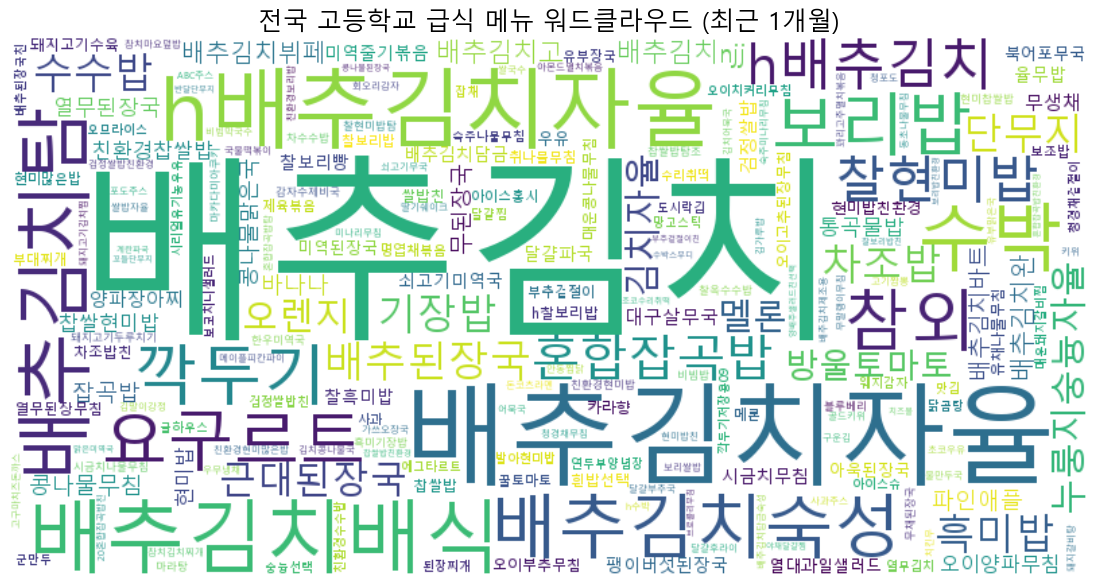

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 메뉴 전처리 함수 (이미 실행한 경우 생략 가능)
def preprocess_menu_text(text_series):
    text_series = text_series.dropna().str.replace("<br/>", " ").str.replace("<br />", " ")
    words = text_series.str.split().explode()
    words = words[~words.str.contains(r"^\(.*\)$")]
    words = words.str.replace(r"[^\uAC00-\uD7A3a-zA-Z0-9]", "", regex=True)
    words = words[words.str.len() > 1]
    return words

# 전처리 + 빈도수 계산
words = preprocess_menu_text(df["급식식단"])
freq_dict = Counter(words)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # ⬅️ Windows 기준 맑은 고딕 경로
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(freq_dict)

# 시각화
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("전국 고등학교 급식 메뉴 워드클라우드 (최근 1개월)", fontsize=18, fontname='Malgun Gothic')
plt.show()

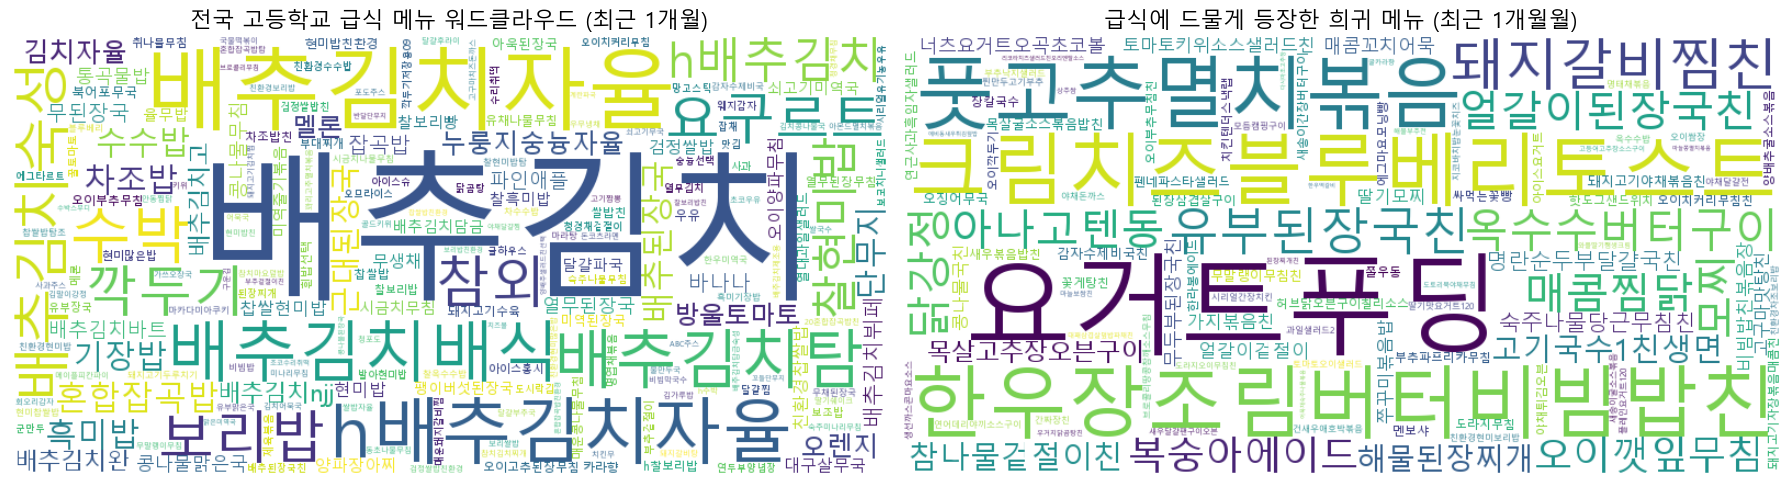

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 
def preprocess_menu_text(text_series):
    text_series = text_series.dropna().str.replace("<br/>", " ").str.replace("<br />", " ")
    words = text_series.str.split().explode()
    words = words[~words.str.contains(r"^\(.*\)$")]
    words = words.str.replace(r"[^\uAC00-\uD7A3a-zA-Z0-9]", "", regex=True)
    words = words[words.str.len() > 1]
    return words

# 데이터 전처리 및 빈도 계산
words = preprocess_menu_text(df["급식식단"])
freq_dict = Counter(words)
rare_menus = dict(Counter(words).most_common()[::-1][:100])

# 워드클라우드 생성
wordcloud_common = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # 맑은 고딕 폰트 적용
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(freq_dict)

wordcloud_rare = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # 맑은 고딕 폰트 적용
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(rare_menus)

# ▶ 1x2 형태 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'  # 전역 폰트 설정
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(wordcloud_common, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("전국 고등학교 급식 메뉴 워드클라우드 (최근 1개월)", fontsize=16)

axes[1].imshow(wordcloud_rare, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("급식에 드물게 등장한 희귀 메뉴 (최근 1개월월)", fontsize=16)

plt.tight_layout()
plt.show()